# Case do Mercado de Combustíveis

## A questão:

O primeiro passo é compreender os dados já disponibilizados pela ANP. Com a base de dados enviada,
responda às seguintes perguntas através de visualizações: Qual é a sazonalidade da venda de combustíveis? Essa sazonalidade é igual em todos os estados? Como o consumo de cada tipo de combustível está
distribuído entre os estados brasileiros? Qual é o tamanho total do mercado e como o mercado evoluiu
durante os últimos 5 anos?

## Importações:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel("dados_desafiodatascientistintern_vendas_distribuidoras_anp.xlsx")

In [4]:
df.head()

,regiao,meses,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,df,1,23310.896,29319.999,30934.830,29295.326,24360.754,27745.916,28110.059,26414.443740,...,27775.156551,27828.123770,31349.982,33989.250,35430.273169,28797.050,27828.534246,26758.416,27481.500,28437.000
1,df,2,25967.743,27720.714,27585.412,28328.216,23477.298,27132.401,26344.263,25573.618074,...,29603.591990,31540.083628,30453.300,34968.900,31957.200000,31339.200,27313.777397,25848.095,29089.500,30150.000
2,df,3,24590.674,32149.816,32724.180,28047.691,30092.094,31146.971,31039.292,31875.141129,...,32997.908444,36202.519600,34267.700,35642.943,37278.568265,34351.200,33516.663013,32373.071,29682.500,29206.000
3,df,4,24975.963,32156.821,33863.218,31787.357,29433.731,31062.637,28794.417,30286.788490,...,33374.872798,33602.215777,36087.800,36848.905,36476.001000,32500.850,28361.689945,30314.696,30781.429,22863.382
4,df,5,27224.597,34122.639,34484.371,32476.371,30442.965,31339.791,32818.387,32274.266232,...,34268.977950,36364.245354,36738.123,39003.000,36793.025000,32512.108,31433.943013,29546.745,31945.500,25737.500


## Sazonalidade:

In [5]:
# Somando todas as colunas em uma só:
df["soma_total"] = df.iloc[:,[2,22]].sum(axis=1)

In [6]:
# Agregando por mês:
df_sazonalidade = df.groupby("meses")["soma_total"].sum()

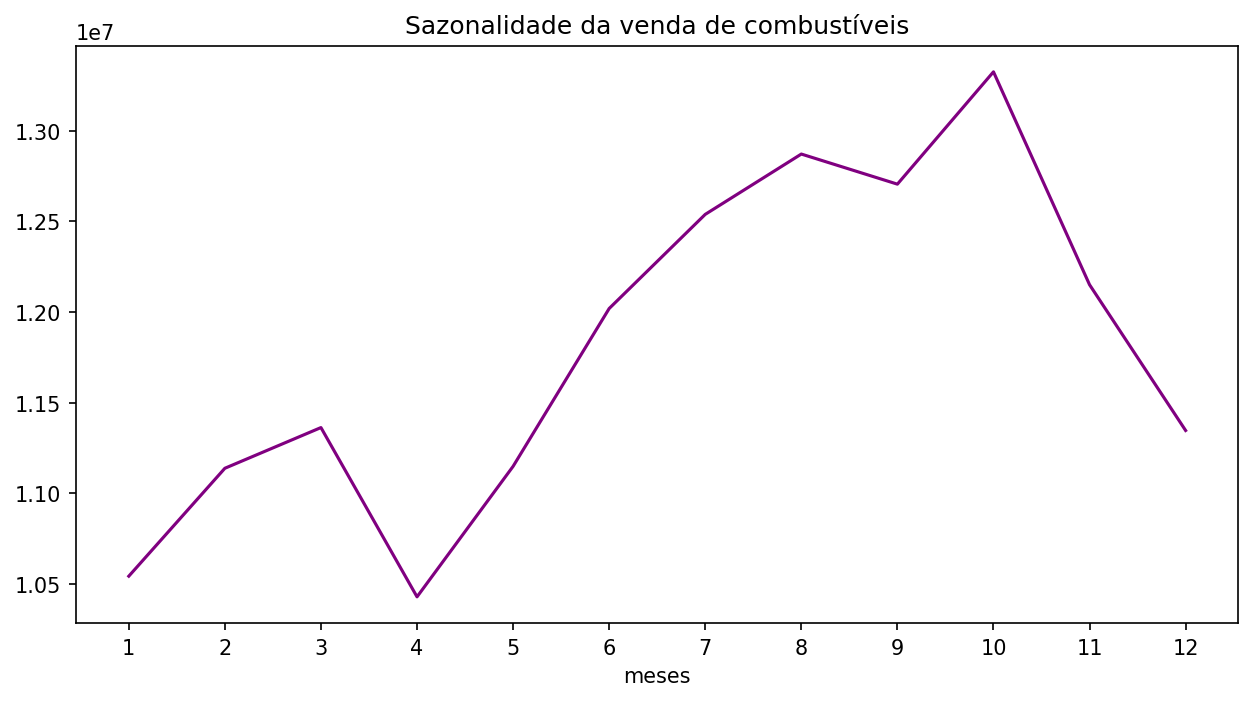

In [19]:
plt.figure(figsize=(10, 5), dpi=150)
df_sazonalidade.plot(title="Sazonalidade da venda de combustíveis", xticks=df_sazonalidade.index, color="purple");

É perceptível a existência de sazonalidade na série temporal, pois há grande diferença entre as vendas ao longo de um ano. No começo do ano as vendas estão em seu pior momento, seguido de uma queda brusca nas vendas no mês de Abril. A partir disso há um aumento crescente nas vendas até entre os meses de Outubro e Novembro, onde há uma queda novamente.

In [8]:
# Ajeitando os dados:
df_sazonalidade_regiao = df.groupby(["regiao","meses"])["soma_total"].sum()
meses = df["regiao"].value_counts().index.to_list()

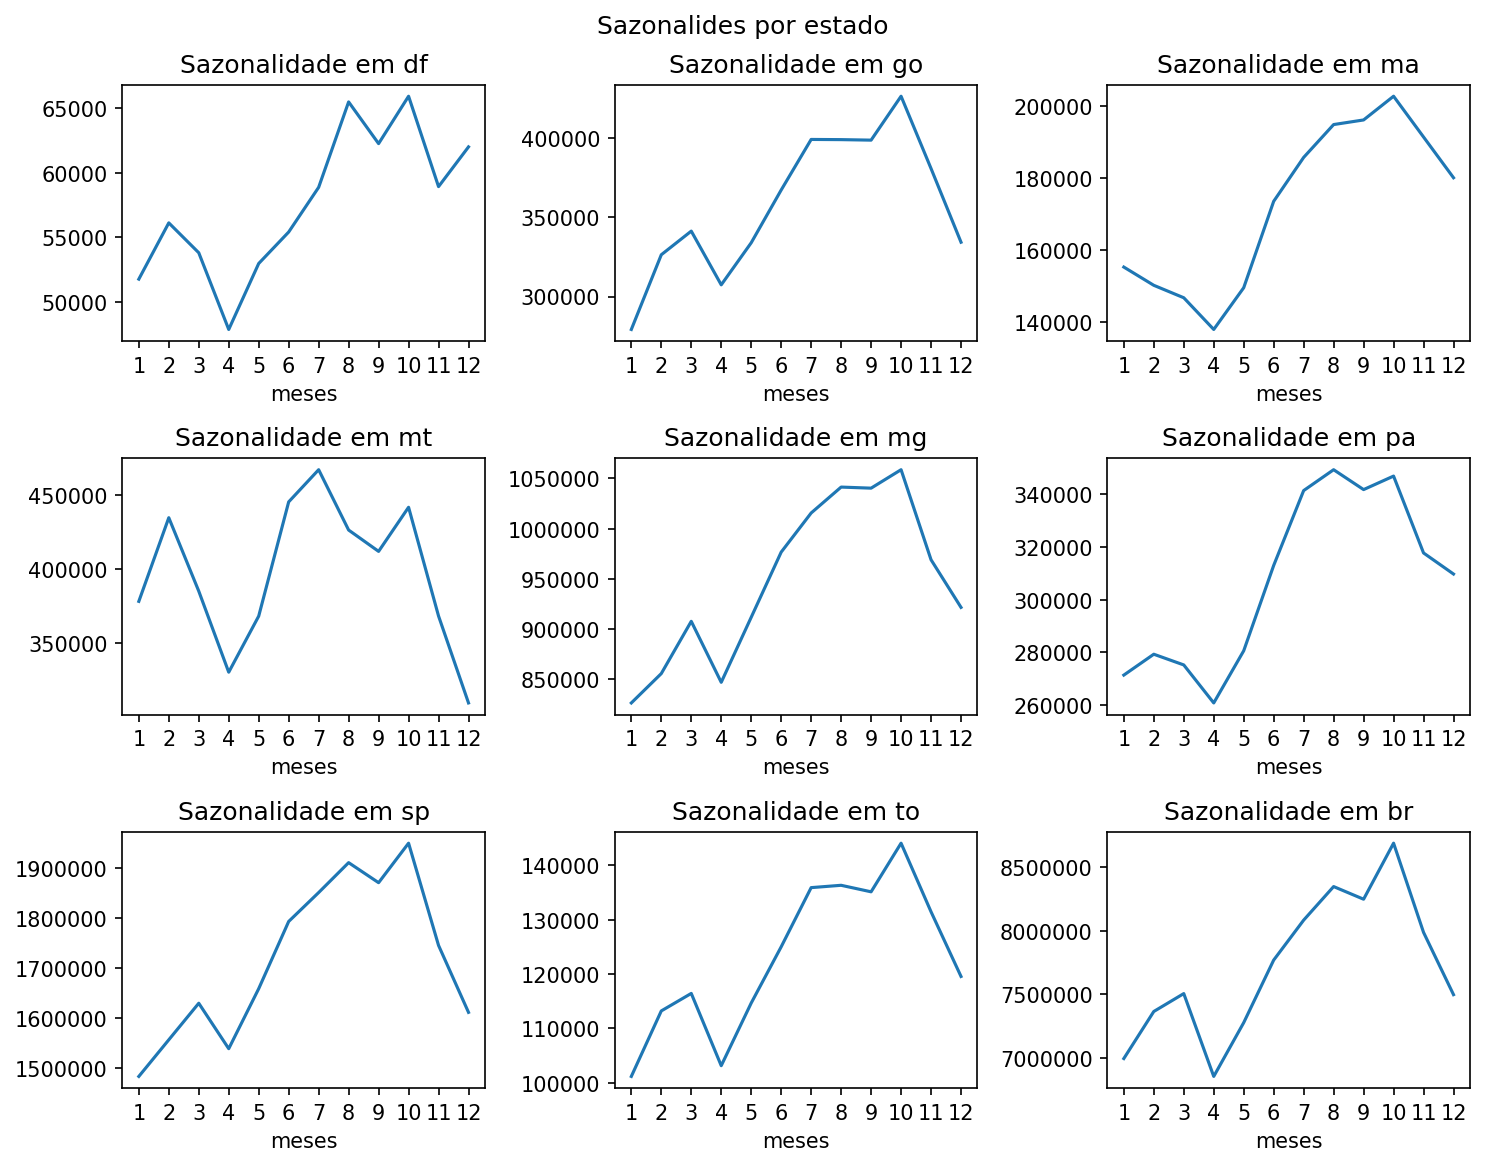

In [9]:
plt.figure(figsize=(10, 10), dpi=150)
plt.suptitle("Sazonalides por estado")
for mes, index in zip(meses, range(1,len(meses) + 1)):
    regiao_df = df.loc[df["regiao"] == mes]
    plt.subplot(4, 3, index)
    plt.title(f"Sazonalidade em {mes}")
    sns.lineplot(data=regiao_df,
                 x="meses",
                 y="soma_total")
    plt.ylabel("")
    plt.xticks(regiao_df["meses"])
    plt.ticklabel_format(axis='both', style="plain");
plt.tight_layout()
plt.show()

As sazonalidades de cada região, apesar das diferenças umas das outras, seguem a mesma lógica anterior, um começo de ano fraco, seguido de uma queda no mês de Abril, um aumento crescente até o fim do ano e por fim uma nova queda.

## Total de vendas

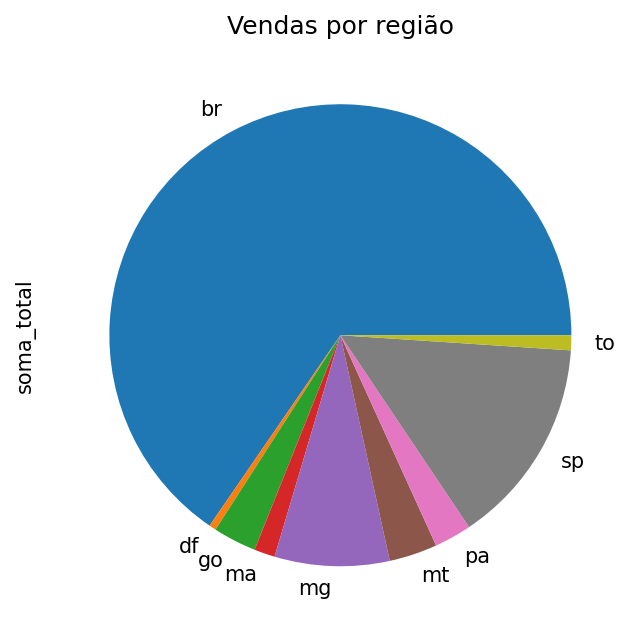

In [22]:
plt.figure(figsize=(10, 5), dpi=150)
df.groupby("regiao")["soma_total"].sum().plot(kind="pie", title="Vendas por região");

Grande parte das vendas estão concentradas na região "br", que provavelmente representam os outros estados não referenciados. Porém é possível notar a grande diferença de venda de combustíveis nos estados de Minas Gerais e São Paulo, ocupando uma parcela muito maior do gráfico do que os outros estados.

In [11]:
# Pegando os anos:
indices = df.drop(columns=["regiao", "meses", "soma_total"]).columns.to_list()

In [ ]:
# Criando uma série com os dados de todos os anos e uma série com os anos:
anos = pd.Series(["2000" for n in range(0, len(df[2000]))])
serie_vendas = df[2000]
for index in indices[1:]:
    serie_vendas = serie_vendas.append(df[index])
    anos = anos.append(pd.Series([str(index) for n in range(0, len(df[index]))]))

In [30]:
# Formando a série temporal 
serie_temporal = pd.concat([serie_total, primeira_serie], axis=1)

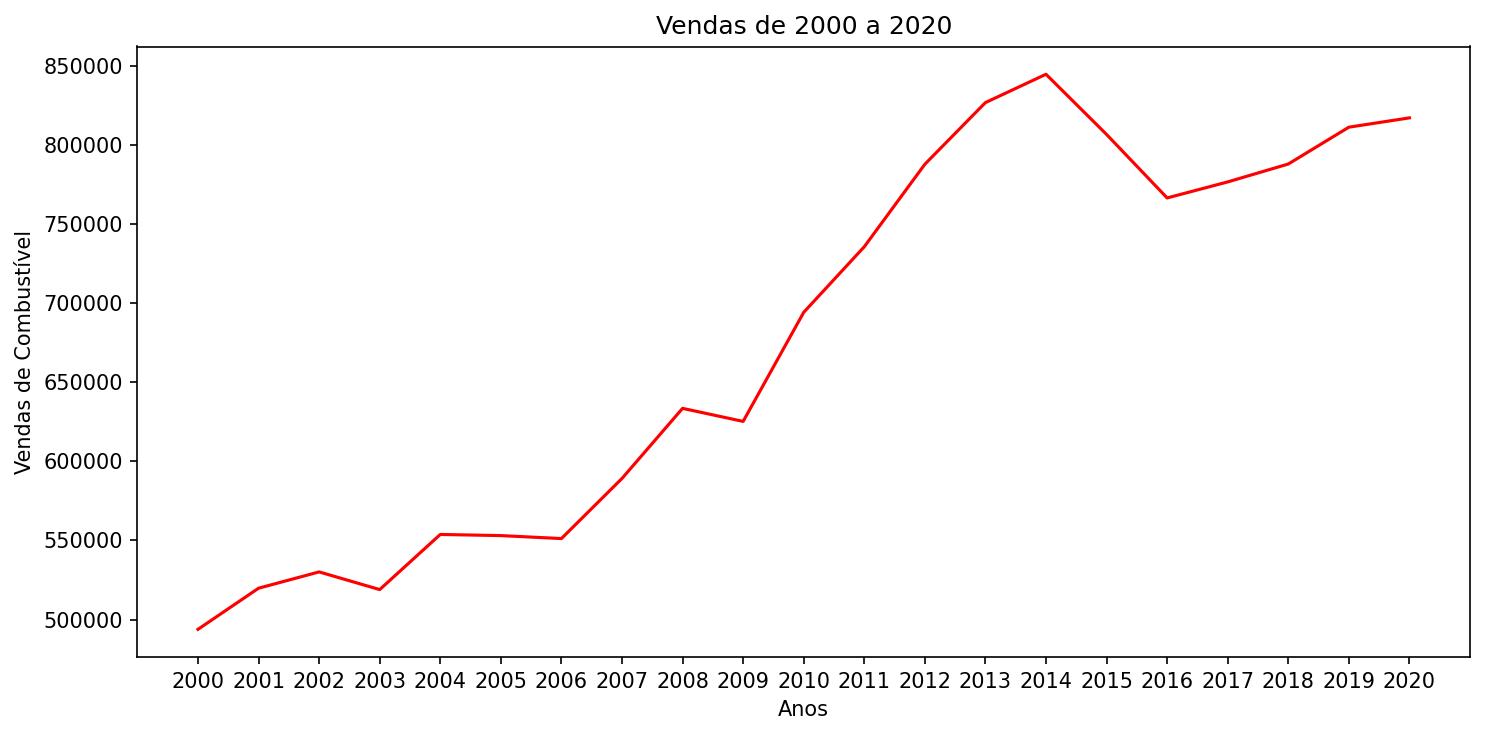

In [34]:
plt.figure(figsize=(10, 5), dpi=150)
plt.title("Vendas de 2000 a 2020")
sns.lineplot(x=serie_temporal.iloc[:, 0], y=serie_temporal.iloc[:,1], color="red", errorbar=None)
plt.xlabel("Anos")
plt.ylabel("Vendas de Combustível")
plt.tight_layout()
plt.show()

O mercado de combustíveis vem crescendo desde 2000, porém enfrentou uma queda durante o período entre 2014 e 2016, provavelmente devido a recessão econômica que ocorreu no mesmo período, posteriormente as vendas de combustível voltaram a crescer, porém em menor grau e abaixo do auge.

In [46]:
# Tamanho do mercado no último período temporal:
serie_temporal.groupby(0).sum().tail(1)

,1
0,
2020,8.824105e+07


In [47]:
8.824105e+07

88241050.0

O tamanho do mercado no último período temporal é de 88.241.050.